# Assignment 4

<h1> Assignment Outcomes: </h1>

- You should be able to understand the concept of A/B testing and how to analyze its result.

<b> Instruction: </b> <br>
Create an uplift analysis using the any public dataset such as: <br>
<a href='https://www.kaggle.com/datasets/ilkeryildiz/example-dataset-for-ab-test'> https://www.kaggle.com/datasets/ilkeryildiz/example-dataset-for-ab-test <a/> <br>
<a href='https://www.kaggle.com/datasets/putdejudomthai/ecommerce-ab-testing-2022-dataset1'> https://www.kaggle.com/datasets/putdejudomthai/ecommerce-ab-testing-2022-dataset1 <a/>

<b> In your analysis you should include the following: </b>
<ul>
    <li> Problem definition </li>
    <li> Formulating hypotheses </li>
    <li> Testing hypotheses </li>
    <li> Result interpretation </li>
</ul>

<b> Submission: </b>
<ul>
    <li> Submit your analysis in a google slides (no more than 7 slides) </li>
    <li> Submit with the following format: #04_3 last digit of participant ID_Nama Lengkap. <br> Example: #04_300_Alya Aliski </li>
</ul>

<b> Assessment requirement: </b>
<ul>
    <li> Problem definition </li>
    <li> Hypotheses formulation </li>
    <li> Hypotheses testing </li>
    <li> Clear result interpretation </li>
</ul>





# Data Information

<h2> About Dataset </h2>

<p> A company recently introduced a new bidding type, “average bidding”, as an alternative to its exisiting bidding type, called “maximum bidding”. One of our clients, ….com, has decided to test this new feature and wants to conduct an A/B test to understand if average bidding brings more conversions than maximum bidding. </p>

<p> The A/B test has run for 1 month and ….com now expects you to analyze and present the results of this A/B test. </p>

<h3> Description data </h3>

<ul>
    <li> <b> Campaign Name : </b> Campaign Name </li>
    <li> <b> Date : </b> Date </li>
    <li> <b> Spend [USD] : </b> The money spent </li>
    <li> <b> # of Impressions : </b> It is a variable for the user to see an ad. </li>
    <li> <b> Reach : </b> The number of unique people who saw an ad. </li>
    <li> <b> # of Website Clicks : </b> It is the variable related to the user clicking the website link in the advertisement. </li>
    <li> <b> # of Searches : </b> It is the variable related to the user performing a search on the website. </li>
    <li> <b> # of View Content : </b> It is the variable related to the user viewing the details of a product. </li>
    <li> <b> # of Add to Cart : </b> It is the variable related to the user adding the product to the cart. </li>
    <li> <b> # of Purchase : </b> It is the variable related to the user's purchase of the product. </li>
</ul>

# Import Library

In [ ]:
import pandas as pd

# Import Data

In [ ]:
# Run 4 code line below if using kaggle
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
# Run if using google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [ ]:
# Expand Layout
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
# Run 2 code line below if using kaggle
# df_control = pd.read_csv('../input/example-dataset-for-ab-test/control_group.csv', sep =';')
# df_test = pd.read_csv('../input/example-dataset-for-ab-test/test_group.csv', sep =';')

In [ ]:
# Run 2 code line below if using google drive
df_control = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 4/control_group.csv', sep =';')
df_test = pd.read_csv('/content/drive/MyDrive/Data Science/Assignment 4/test_group.csv', sep =';')

In [ ]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


In [ ]:
df_control.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [ ]:
df_test.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


# Merging Data

In [ ]:
merge_df = df_control.merge(df_test, how='outer')
merge_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merge_df.tail()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
55,Test Campaign,26.08.2019,2311,80841.0,61589.0,3820.0,2037.0,1046.0,346.0,284.0
56,Test Campaign,27.08.2019,2915,111469.0,92159.0,6435.0,2976.0,2552.0,992.0,771.0
57,Test Campaign,28.08.2019,2247,54627.0,41267.0,8144.0,2432.0,1281.0,1009.0,721.0
58,Test Campaign,29.08.2019,2805,67444.0,43219.0,7651.0,1920.0,1240.0,1168.0,677.0
59,Test Campaign,30.08.2019,1977,120203.0,89380.0,4399.0,2978.0,1625.0,1034.0,572.0


# Preprocessing Data

## Data Cleaning

### Missing Value

In [ ]:
merge_df.isna().values.any()

True

In [ ]:
# Run if result from merge_df.isna().values.any() is True
merge_df.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [ ]:
merge_df[merge_df.isna().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merge_df.dropna(inplace=True)
merge_df.isna().sum()

Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [ ]:
# Reset index because dropping row
new_df = merge_df.reset_index()

In [ ]:
# Drop column which name is index
new_df.drop('index', axis=1, inplace=True)

In [ ]:
new_df.index

RangeIndex(start=0, stop=59, step=1)

In [ ]:
new_df

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0
5,Control Campaign,7.08.2019,2544,142123.0,127852.0,2640.0,1388.0,1106.0,1166.0,499.0
6,Control Campaign,8.08.2019,1900,90939.0,65217.0,7260.0,3047.0,2746.0,930.0,462.0
7,Control Campaign,9.08.2019,2813,121332.0,94896.0,6198.0,2487.0,2179.0,645.0,501.0
8,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
9,Control Campaign,11.08.2019,2490,115247.0,95843.0,8137.0,2941.0,2486.0,1887.0,475.0


### Duplicated Data

In [ ]:
new_df.duplicated().values.any()

False

In [ ]:
# Run if result from new_df.duplicated().values.any() is True
# new_df.duplicated().sum()

## Manipulating Column Name

In [ ]:
new_df.columns = new_df.columns.str.lower()
new_df = new_df.rename(columns=lambda x: x.replace('[usd]', 'usd').replace('#', 'number').replace(' ', '_'))
new_df.head()

,campaign_name,date,spend_usd,number_of_impressions,reach,number_of_website_clicks,number_of_searches,number_of_view_content,number_of_add_to_cart,number_of_purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


## Manipulating Format Date

In [ ]:
new_df['date'] = new_df['date'].str.replace('.', '-')
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,campaign_name,date,spend_usd,number_of_impressions,reach,number_of_website_clicks,number_of_searches,number_of_view_content,number_of_add_to_cart,number_of_purchase
0,Control Campaign,1-08-2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2-08-2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3-08-2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4-08-2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,6-08-2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [ ]:
new_df['date'] = pd.to_datetime(new_df['date'], format ='%d-%m-%Y')
new_df.head()

,campaign_name,date,spend_usd,number_of_impressions,reach,number_of_website_clicks,number_of_searches,number_of_view_content,number_of_add_to_cart,number_of_purchase
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   campaign_name             59 non-null     object        
 1   date                      59 non-null     datetime64[ns]
 2   spend_usd                 59 non-null     int64         
 3   number_of_impressions     59 non-null     float64       
 4   reach                     59 non-null     float64       
 5   number_of_website_clicks  59 non-null     float64       
 6   number_of_searches        59 non-null     float64       
 7   number_of_view_content    59 non-null     float64       
 8   number_of_add_to_cart     59 non-null     float64       
 9   number_of_purchase        59 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 4.7+ KB


# Exploratory Data Analysis

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   campaign_name             59 non-null     object        
 1   date                      59 non-null     datetime64[ns]
 2   spend_usd                 59 non-null     int64         
 3   number_of_impressions     59 non-null     float64       
 4   reach                     59 non-null     float64       
 5   number_of_website_clicks  59 non-null     float64       
 6   number_of_searches        59 non-null     float64       
 7   number_of_view_content    59 non-null     float64       
 8   number_of_add_to_cart     59 non-null     float64       
 9   number_of_purchase        59 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 4.7+ KB


In [ ]:
new_df.describe()

,spend_usd,number_of_impressions,reach,number_of_website_clicks,number_of_searches,number_of_view_content,number_of_add_to_cart,number_of_purchase
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2435.762712,91775.881356,70868.644068,5682.593220,2321.813559,1900.169492,1087.220339,522.000000
std,376.358795,32465.070636,31023.653515,1754.777559,669.040576,687.263844,430.205246,196.973917
min,1757.000000,22521.000000,10598.000000,2277.000000,1001.000000,848.000000,278.000000,222.000000
25%,2113.500000,68853.500000,43230.000000,4227.500000,1962.500000,1249.000000,848.500000,340.000000
50%,2421.000000,95843.000000,76219.000000,5691.000000,2390.000000,1975.000000,1075.000000,501.000000
75%,2743.000000,117315.000000,95490.500000,7218.500000,2778.500000,2424.000000,1386.500000,693.000000
max,3112.000000,145248.000000,127852.000000,8264.000000,4891.000000,4219.000000,1913.000000,890.000000


In [ ]:
new_df.corr()

,spend_usd,number_of_impressions,reach,number_of_website_clicks,number_of_searches,number_of_view_content,number_of_add_to_cart,number_of_purchase
spend_usd,1.000000,-0.061667,-0.111151,-0.057257,0.021775,-0.020850,-0.143060,0.031446
number_of_impressions,-0.061667,1.000000,0.888076,-0.211908,-0.176981,-0.066400,0.279214,0.051899
reach,-0.111151,0.888076,1.000000,-0.271639,-0.126307,-0.035573,0.241364,0.038860
number_of_website_clicks,-0.057257,-0.211908,-0.271639,1.000000,0.369445,0.418337,-0.000277,-0.033163
number_of_searches,0.021775,-0.176981,-0.126307,0.369445,1.000000,0.890481,0.029575,0.035524
number_of_view_content,-0.020850,-0.066400,-0.035573,0.418337,0.890481,1.000000,0.148539,0.059368
number_of_add_to_cart,-0.143060,0.279214,0.241364,-0.000277,0.029575,0.148539,1.000000,0.385706
number_of_purchase,0.031446,0.051899,0.038860,-0.033163,0.035524,0.059368,0.385706,1.000000


## Import Library

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Import Gambar
from IPython.display import Image

## Corellation Heat Map

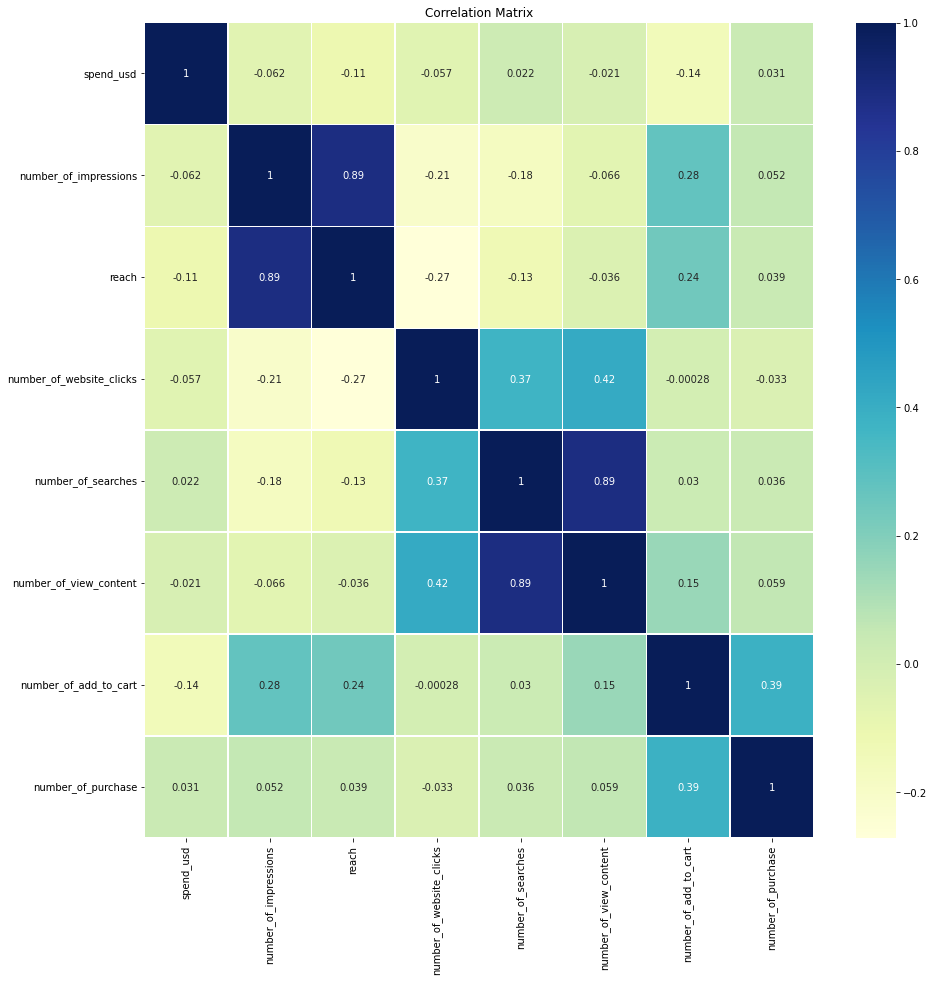

In [ ]:
df_numerized = new_df.copy()

plt.figure(figsize=(15,15))
sns.heatmap(data=df_numerized.corr(), annot=True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlation Matrix', fontsize=12);

## Membandingkan Pengeluaran dari kedua Campaign

In [ ]:
spend = new_df.groupby('campaign_name')['spend_usd'].sum().reset_index()
spend

,campaign_name,spend_usd
0,Control Campaign,66818
1,Test Campaign,76892


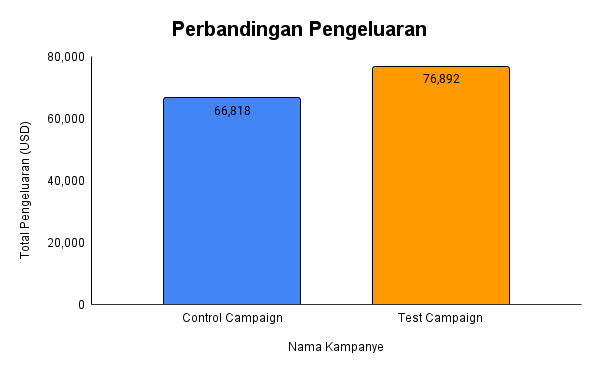

In [ ]:
Image('/content/drive/MyDrive/Data Science/Assignment 4/Perbandingan Pengeluaran.png')

# Problem Definition

Mengetahui kinerja dari Implementasi A / B Testing terhadap suatu campaign

# Formulating Hypotheses

<ol>
    <li> Dengan adanya kampanye yang baru, maka banyaknya pelanggan yang melihat iklan akan meningkat dari sebelumnya </li>
    <li> Dengan adanya kampanye yang baru, maka bounce rate yang diperoleh akan meningkat dari sebelumnya </li>
    <li> Dengan adanya kampanye yang baru, maka basket rate yang diperoleh akan meningkat dari sebelumnya </li>
</ol>

# Testing Hypotheses

<ol>
    <li> <h3> Dengan adanya kampanye yang baru, maka banyaknya pelanggan yang melihat iklan akan meningkat dari sebelumnya </h3>
    - H1 : Dengan adanya kampanye yang baru, maka banyaknya pelanggan yang melihat iklan akan meningkat dari sebelumnya <br>
    - H0 : (Tolak H1) atau Dengan adanya kampanye yang baru, maka banyaknya pelanggan yang melihat iklan akan menurun dari sebelumnya</li>
    <li> <h3> Dengan adanya kampanye yang baru, maka bounce rate yang diperoleh akan meningkat dari sebelumnya </h3>
    - H1 : Dengan adanya kampanye yang baru, maka bounce rate yang diperoleh akan meningkat dari sebelumnya <br>
    - H0 : (Tolak H1) atau Dengan adanya kampanye yang baru, maka bounce rate yang diperoleh akan menurun dari sebelumnya </li>
    <li> <h3> Dengan adanya kampanye yang baru, maka basket rate yang diperoleh akan meningkat dari sebelumnya </h3>
    - H1 : Dengan adanya kampanye yang baru, maka basket rate yang diperoleh akan meningkat dari sebelumnya <br>
    - H0 : (Tolak H1) atau Dengan adanya kampanye yang baru, maka basket rate yang diperoleh akan menurun dari sebelumnya </li>
</ol>

# Result Interpretation

## 1. Dengan adanya kampanye yang baru, maka banyaknya pelanggan yang melihat iklan akan meningkat dari sebelumnya

In [ ]:
total_reach = new_df.groupby('campaign_name')['reach'].sum().reset_index()
total_reach.rename(columns={'campaign_name':'Nama Kampanye'}, inplace=True)
total_reach.rename(columns={'reach':'Total Pelanggan'}, inplace=True)
total_reach

,Nama Kampanye,Total Pelanggan
0,Control Campaign,2576503.0
1,Test Campaign,1604747.0


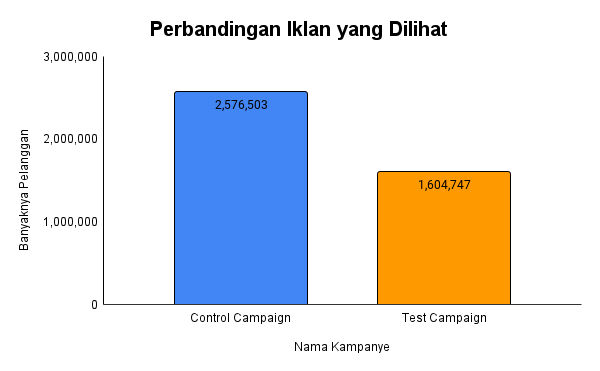

In [ ]:
Image('/content/drive/MyDrive/Data Science/Assignment 4/Perbandingan Iklan yang Dilihat.png')

Informasi di atas menampilkan banyaknya pelanggan yang melihat iklan ditinjau dari masing-masing kampanye.

Dari hasil di atas dapat dilihat bahwa banyaknya pelanggan yang melihat iklan pada Test Campaign atau kampanye yang baru lebih sedikit dari sebelumnya sehingga dapat diambil kesimpulan jika `Dengan adanya kampanye yang baru, maka banyaknya pelanggan yang melihat iklan akan menurun dari sebelumnya`.

Dari hasil tersebut maka keputusan hipotesisnya adalah `H1 ditolak` dan `H0 diterima`

## 2. Dengan adanya kampanye yang baru, maka bounce rate yang diperoleh akan meningkat dari sebelumnya

Menurut saya, Bounce rate suatu marketing dalam internet yang menggunakan analisis berdasarkan tracking melalui web. Jika dalam kasus ini, Bounce rate merepresentasikan presentase pengunjung yang hanya melihat detail produk lalu meninggalkannya (tidak melakukan pembelian).

In [ ]:
view_control = new_df.loc[new_df['campaign_name'] == 'Control Campaign']['number_of_view_content'].sum()
view_test = new_df.loc[new_df['campaign_name'] == 'Test Campaign']['number_of_view_content'].sum()
print(view_control, view_test)

56370.0 55740.0


In [ ]:
purchase_control = new_df.loc[new_df['campaign_name'] == 'Control Campaign']['number_of_purchase'].sum()
purchase_test = new_df.loc[new_df['campaign_name'] == 'Test Campaign']['number_of_purchase'].sum()
print(purchase_control, purchase_test)

15161.0 15637.0


In [ ]:
bcr_control = ((view_control - purchase_control) / view_control) * 100
bcr_test = ((view_test - purchase_test) / view_test) * 100
print(bcr_control, bcr_test)

73.10448820294482 71.94653749551489


In [ ]:
bcr = bcr_test - bcr_control
print('{0:.2f}%'.format(bcr))

-1.16%


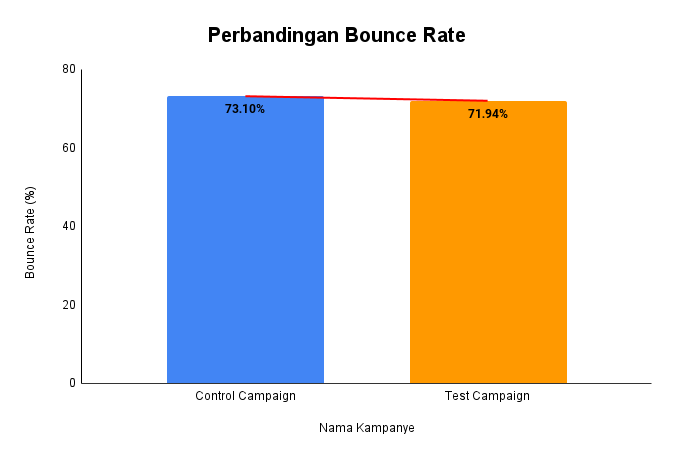

In [ ]:
Image('/content/drive/MyDrive/Data Science/Assignment 4/Perbandingan Bounce Rate.png')

Informasi di atas menampilkan bounce rate yang ditinjau dari masing-masing kampanye.

Dari hasil di atas dapat bahwa dilihat bounce rate mengalami penurunan sebanyak 1.16% yaitu dari 73.10% menjadi 71.94% sehingga dapat diambil kesimpulan jika `Dengan adanya kampanye yang baru, maka bounce rate yang diperoleh akan menurun dari sebelumnya`.

Dari hasil tersebut maka keputusan hipotesisnya adalah `H1 ditolak` dan `H0 diterima`

## 3. Dengan adanya kampanye yang baru, maka basket rate yang diperoleh akan meningkat dari sebelumnya

Menurut saya, Basket rate suatu marketing dalam internet yang menggunakan analisis berdasarkan persentase penambahan keranjang. Jika dalam kasus ini, basket rate merepresentasikan presentase pengunjung yang melihat detail produk lalu menambahkannya ke keranjang.

In [ ]:
view_control = new_df.loc[new_df['campaign_name'] == 'Control Campaign']['number_of_view_content'].sum()
view_test = new_df.loc[new_df['campaign_name'] == 'Test Campaign']['number_of_view_content'].sum()
print(view_control, view_test)

56370.0 55740.0


In [ ]:
add_control = new_df.loc[new_df['campaign_name'] == 'Control Campaign']['number_of_add_to_cart'].sum()
add_test = new_df.loc[new_df['campaign_name'] == 'Test Campaign']['number_of_add_to_cart'].sum()
print(add_control, add_test)

37700.0 26446.0


In [ ]:
br_control = ((view_control - add_control) / view_control) * 100
br_test = ((view_test - add_test) / view_test) * 100
print(br_control, br_test)

33.120454142274255 52.55471833512738


In [ ]:
br = br_test - br_control
print('{0:.2f}%'.format(br))

19.43%


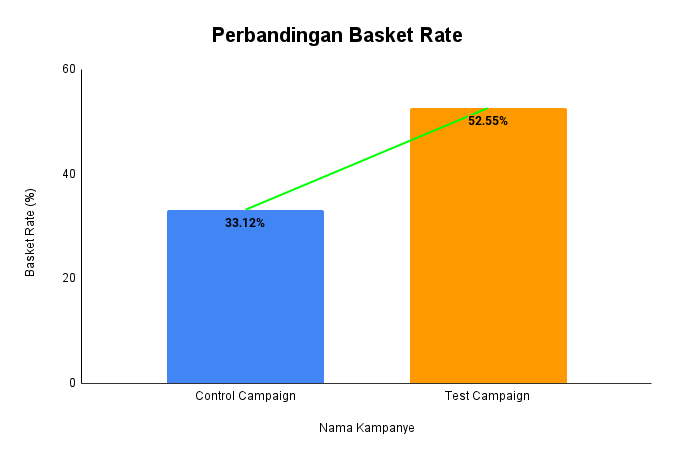

In [ ]:
Image('/content/drive/MyDrive/Data Science/Assignment 4/Perbandingan Basket Rate.png')

Informasi di atas menampilkan basket rate yang ditinjau dari masing-masing kampanye.

Dari hasil di atas dapat dilihat bahwa basket rate mengalami peningkatan sebanyak 19.43% yaitu dari 33.12% menjadi 52.55% sehingga dapat diambil kesimpulan jika `Dengan adanya kampanye yang baru, maka basket rate yang diperoleh akan meningkat dari sebelumnya`.

Dari hasil tersebut maka keputusan hipotesisnya adalah `H1 diterima` dan `H0 ditolak`